In [4]:
import socket
from time import time
import argparse
import torch
import torch.optim as optim
import networkx as nx
from tqdm import tqdm
from hyperbolicity.delta import compute_hyperbolicity_batch, compute_hyperbolicity
from hyperbolicity.utils import floyd_warshall, soft_max, construct_weighted_matrix, make_batches
from hyperbolicity.tree_fitting_methods.gromov import gromov_tree
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tikzplotlib

In [5]:
base_path = '../datasets'

c_elegan = 'D_csphd.pkl'
c_elegan_path = os.path.join(base_path, c_elegan)
with open(c_elegan_path, 'rb') as f:
    distances = pickle.load(f)
distances = torch.tensor(distances).to('cuda').type(torch.float32)
true_delta = 6.5

In [6]:
delta_scale = 1000
n_batches = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
batch_size = [4, 8, 16, 32]
n_exp = 5
results = {i: [] for i in batch_size}

for i in batch_size:
    for j in n_batches:
        exp = []
        for k in range(n_exp):
            M_batch = make_batches(distances, i, j)
            delta_soft = soft_max(compute_hyperbolicity_batch(M_batch, 100), 100)
            exp.append(delta_soft.item())
        results[i].append(np.mean(exp))
        print(f'n_batches {j} done !')
    print(f'batch_size {i} done !')


n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
n_batches 90 done !
n_batches 100 done !
batch_size 4 done !
n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
n_batches 90 done !
n_batches 100 done !
batch_size 8 done !
n_batches 1 done !
n_batches 2 done !
n_batches 3 done !
n_batches 4 done !
n_batches 5 done !
n_batches 10 done !
n_batches 20 done !
n_batches 30 done !
n_batches 40 done !
n_batches 50 done !
n_batches 60 done !
n_batches 70 done !
n_batches 80 done !
n_batches 90 done !
n_batches 100 done !
batch_size 16 done !
n_batches 1 done !
n_batches 2 done !
n_batches 3 d

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.41 GiB. GPU 0 has a total capacity of 10.75 GiB of which 97.62 MiB is free. Process 4165648 has 628.00 MiB memory in use. Process 495028 has 2.35 GiB memory in use. Including non-PyTorch memory, this process has 7.70 GiB memory in use. Of the allocated memory 5.86 GiB is allocated by PyTorch, and 1.66 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

IndexError: list index out of range

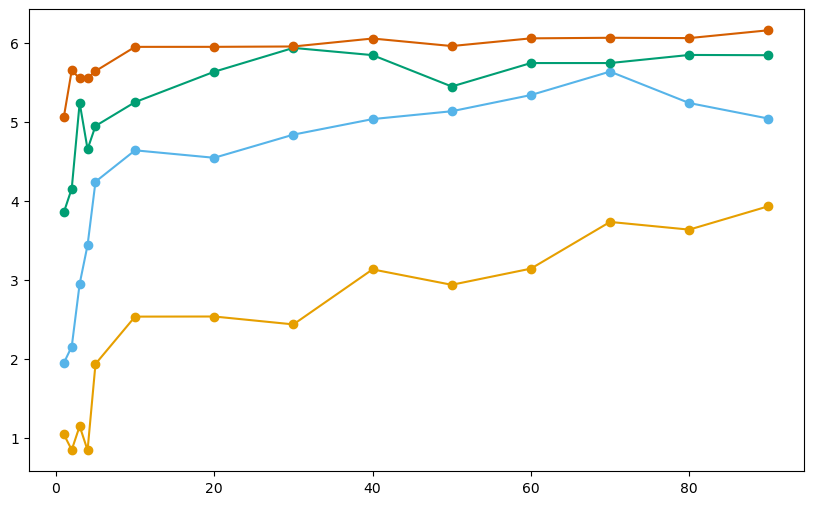

In [ ]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#D55E00']
plt.figure(figsize=(10, 6))
for idx, i in enumerate(batch_size):
    plt.plot(n_batches, results[i], label=f'Batch size {i}', marker='o', color=colors[idx])

# Add horizontal line for true delta
plt.axhline(y=true_delta, color='gray', linestyle='--', linewidth=2, label='True δ = 6.5')

# Set log scale for x-axis
plt.xscale('log')

# Labels and legend
plt.xlabel("Number of Batches (log scale)")
plt.ylabel("Mean Hyperbolicity (δ-soft)")
plt.title("Hyperbolicity vs Number of Batches for Different Batch Sizes (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

colors = ['#648FFF', '#56B4E9', '#DC267F', '#FE6100', '#FFB000']
plt.figure(figsize=(10, 6))
for idx, i in enumerate(batch_size):
    plt.plot(n_batches, results[i], label=f'Batch size {i}', marker='o', color=colors[idx])

# Add horizontal line for true delta
plt.axhline(y=true_delta, color='gray', linestyle='--', linewidth=2, label='True δ = 6.5')

# Set log scale for x-axis
plt.xscale('log')

# Labels and legend
plt.xlabel("Number of Batches (log scale)")
plt.ylabel("Mean Hyperbolicity (δ-soft)")
plt.title("Hyperbolicity vs Number of Batches for Different Batch Sizes (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
tikzplotlib.save("/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/hyperbolicity_plot.tex")
plt.show()